# **Classification of 100 K Coursera's Course Review**

**Importing Libraries and Datasets**

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import string
import requests
from sklearn.model_selection import train_test_split 

In [2]:
# Importing the data
data = pd.read_csv("reviews_by_course.csv")

In [3]:
# Visualizing the dataframe
data.head(10)

,CourseId,Review,Label
0,2-speed-it,BOring,1
1,2-speed-it,Bravo !,5
2,2-speed-it,Very goo,5
3,2-speed-it,"Great course - I recommend it for all, especia...",5
4,2-speed-it,One of the most useful course on IT Management!,5
5,2-speed-it,I was disappointed because the name is mislead...,3
6,2-speed-it,Super content. I'll definitely re-do the course,5
7,2-speed-it,Etant contrôleur de gestion pour le départemen...,5
8,2-speed-it,One of the excellent courses at Coursera for i...,5
9,2-speed-it,Is there any reason why you should not apply t...,5


**Preprocessing**

In [4]:
# Function to lowercase the text
def lowercase(text):
    return str(text).lower()

data["Review_processed_1"] = data["Review"].apply(lambda x: lowercase(x))

In [5]:
# Functions to expand contractions
contractions = { 
                    "ain't": "am not",
                    "aren't": "are not",
                    "can't": "cannot",
                    "can't've": "cannot have",
                    "'cause": "because",
                    "could've": "could have",
                    "couldn't": "could not",
                    "couldn't've": "could not have",
                    "didn't": "did not",
                    "doesn't": "does not",
                    "don't": "do not",
                    "hadn't": "had not",
                    "hadn't've": "had not have",
                    "hasn't": "has not",
                    "haven't": "have not",
                    "he'd": "he had",
                    "he'd've": "he would have",
                    "he'll": "he shall",
                    "he'll've": "he shall have",
                    "he's": "he has",
                    "how'd": "how did",
                    "how'd'y": "how do you",
                    "how'll": "how will",
                    "how's": "how is",
                    "I'd": "I had",
                    "I'd've": "I would have",
                    "I'll": "I shall",
                    "I'll've": "I shall have",
                    "I'm": "I am",
                    "I've": "I have",
                    "isn't": "is not",
                    "it'd": "it had",
                    "it'd've": "it would have",
                    "it'll": "it shall",
                    "it'll've": "it shall have",
                    "it's": "it is",
                    "let's": "let us",
                    "ma'am": "madam",
                    "mayn't": "may not",
                    "might've": "might have",
                    "mightn't": "might not",
                    "mightn't've": "might not have",
                    "must've": "must have",
                    "mustn't": "must not",
                    "mustn't've": "must not have",
                    "needn't": "need not",
                    "needn't've": "need not have",
                    "o'clock": "of the clock",
                    "oughtn't": "ought not",
                    "oughtn't've": "ought not have",
                    "shan't": "shall not",
                    "sha'n't": "shall not",
                    "shan't've": "shall not have",
                    "she'd": "she would",
                    "she'd've": "she would have",
                    "she'll": "she will",
                    "she'll've": "she will have",
                    "she's": "she is",
                    "should've": "should have",
                    "shouldn't": "should not",
                    "shouldn't've": "should not have",
                    "so've": "so have",
                    "so's": "so is",
                    "that'd": "that would",
                    "that'd've": "that would have",
                    "that's": "that is",
                    "there'd": "there would",
                    "there'd've": "there would have",
                    "there's": "there is",
                    "they'd": "they had",
                    "they'd've": "they would have",
                    "they'll": "they will",
                    "they'll've": "they will have",
                    "they're": "they are",
                    "they've": "they have",
                    "to've": "to have",
                    "wasn't": "was not",
                    "we'd": "we had",
                    "we'd've": "we would have",
                    "we'll": "we will",
                    "we'll've": "we will have",
                    "we're": "we are",
                    "we've": "we have",
                    "weren't": "were not",
                    "what'll": "what will",
                    "what'll've": "what will have",
                    "what're": "what are",
                    "what's": "what is",
                    "what've": "what have",
                    "when's": "when is",
                    "when've": "when have",
                    "where'd": "where did",
                    "where's": "where is",
                    "where've": "where have",
                    "who'll": "who will",
                    "who'll've": "who will have",
                    "who's": "who is",
                    "who've": "who have",
                    "why's": "why is",
                    "why've": "why have",
                    "will've": "will have",
                    "won't": "will not",
                    "won't've": "will not have",
                    "would've": "would have",
                    "wouldn't": "would not",
                    "wouldn't've": "would not have",
                    "y'all": "you all",
                    "y'all'd": "you all would",
                    "y'all'd've": "you all would have",
                    "y'all're": "you all are",
                    "y'all've": "you all have",
                    "you'd": "you would",
                    "you'd've": "you would have",
                    "you'll": "you will",
                    "you'll've": "you will have",
                    "you're": "you are",
                    "you've": "you have"
            }

def replace_contractions(text):
    text = text.split()
    temp = ''
    for i in text:
        if i in contractions:
            temp = temp +" "+ contractions[i]
        else:
            temp = temp + " " + i 
    return temp.strip()

data["Review_processed_2"] = data["Review_processed_1"].apply(lambda x: replace_contractions(x))

In [6]:
# Function to remove the punctuation
def remove_punctuation(text):
    temp = []
    for i in str(text).split():
        temp_2 = ''
        for j in i:
            if j not in string.punctuation:
                if j not in ['0','1','2','3','4','5','6','7','8','9']:
                    temp_2 = temp_2 + j
        if temp_2.strip() != '':
            temp.append(temp_2.strip())
    return ' '.join(temp).strip()

data["Review_processed_3"] = data["Review_processed_2"].apply(lambda x: remove_punctuation(x))

In [7]:
# Function to check if the review contains all the characters from the english 
def check_english(text):
    text = text.split()
    for i in text:
        for j in i:
            x = re.search("[a-z]", j)
            if x is None:
                return 0
    return 1

data["english"] = data["Review_processed_3"].apply(lambda x: check_english(x))

In [8]:
# Selecting only those reviews which are in english
data = data.query('english == 1',engine='python')

In [9]:
# Function to remove stopwords from the reviews
stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stopwords = set(stopwords_list.decode().splitlines()) 

def remove_stopwords(text):
    text = text.split()
    temp = ''
    for i in text:
        if i not in stopwords:
            temp = temp + ' ' + i
    return temp.strip() 

data["Review_processed_4"] = data["Review_processed_3"].apply(lambda x: remove_stopwords(x))

**Visualization**

In [10]:
# Dataframes for different Labels
data_1 = data.query("Label == 1", engine="python")
data_2 = data.query("Label == 2", engine="python")
data_3 = data.query("Label == 3", engine="python")
data_4 = data.query("Label == 4", engine="python")
data_5 = data.query("Label == 5", engine="python")

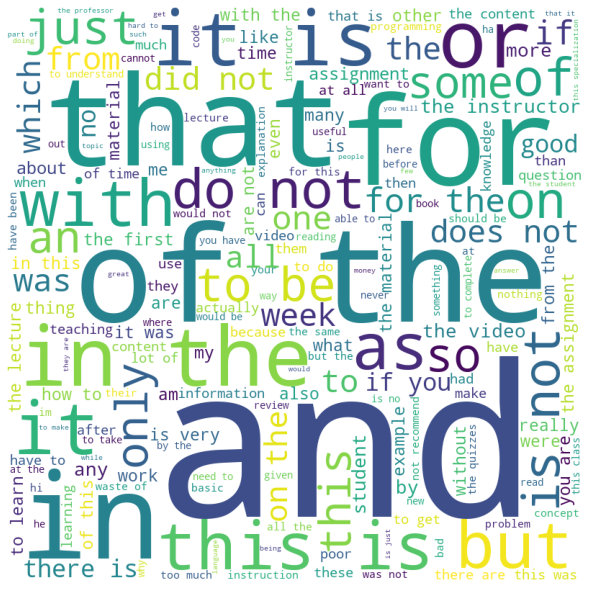

In [11]:
# Wordclouds with Label 1
review_1_corpus = ''
for index,val in data_1.iterrows():
    review_1_corpus = review_1_corpus + " " + val["Review_processed_4"]
review_1_corpus = review_1_corpus.strip()

wordcloud = WordCloud(width = 800, 
                      height = 800,
                      stopwords = ["coursera","course","courses"],
                      background_color ='white',
                      min_font_size = 10).generate(review_1_corpus)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

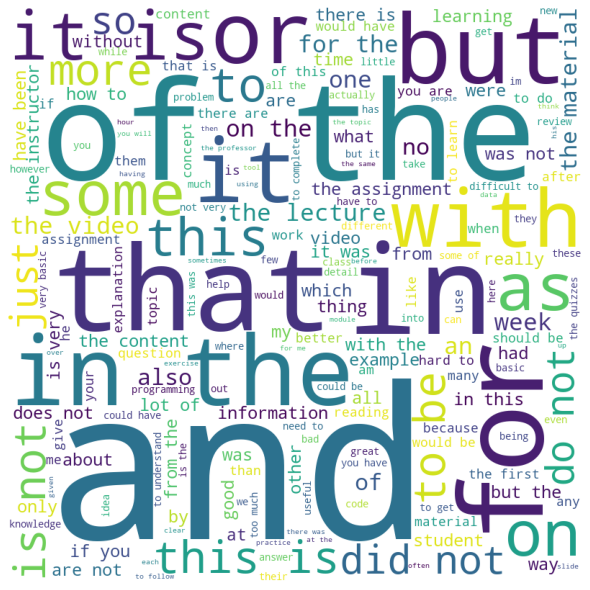

In [12]:
# Wordclouds with Label 2
review_2_corpus = ''
for index,val in data_2.iterrows():
    review_2_corpus = review_2_corpus + " " + val["Review_processed_4"]
review_2_corpus = review_2_corpus.strip()

wordcloud = WordCloud(width = 800, 
                      height = 800,
                      background_color ='white',
                      stopwords = ["coursera","course","courses"],
                      min_font_size = 10).generate(review_2_corpus)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

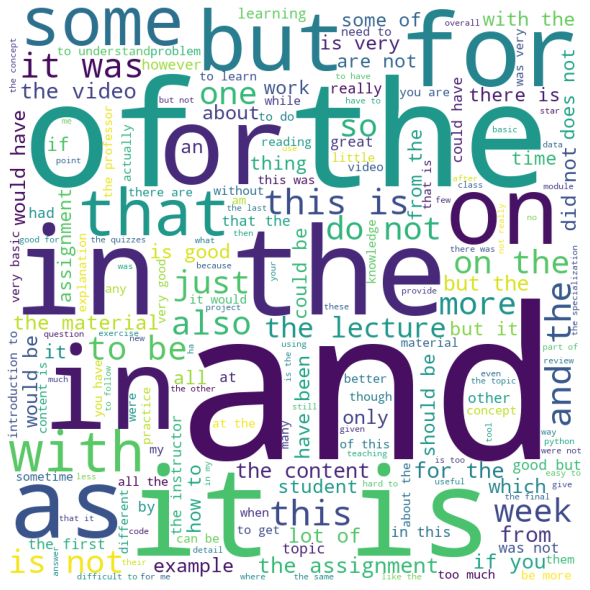

In [13]:
# Wordclouds with Label 3
review_3_corpus = ''
for index,val in data_3.iterrows():
    review_3_corpus = review_3_corpus + " " + val["Review_processed_4"]
review_3_corpus = review_3_corpus.strip()

wordcloud = WordCloud(width = 800, 
                      height = 800,
                      background_color ='white',
                      stopwords = ["coursera","course","courses"],
                      min_font_size = 10).generate(review_3_corpus)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

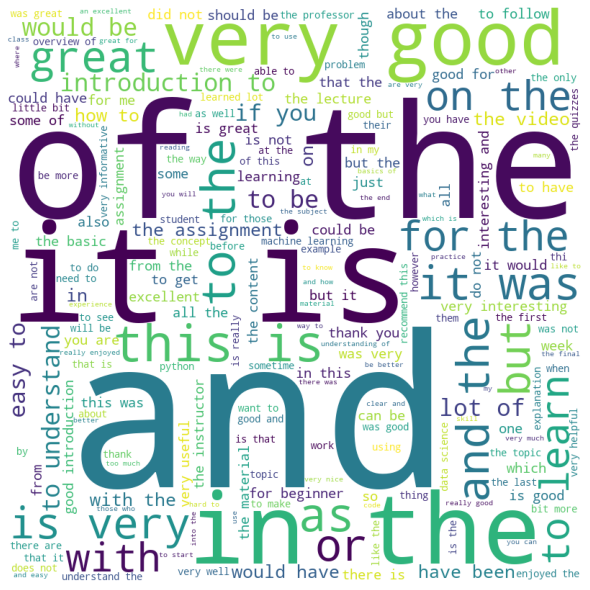

In [14]:
# Wordclouds with Label 4
review_4_corpus = ''
for index,val in data_4.iterrows():
    review_4_corpus = review_4_corpus + " " + val["Review_processed_4"]
review_4_corpus = review_4_corpus.strip()

wordcloud = WordCloud(width = 800, 
                      height = 800,
                      background_color ='white',
                      stopwords = ["coursera","course","courses"],
                      min_font_size = 10).generate(review_4_corpus)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

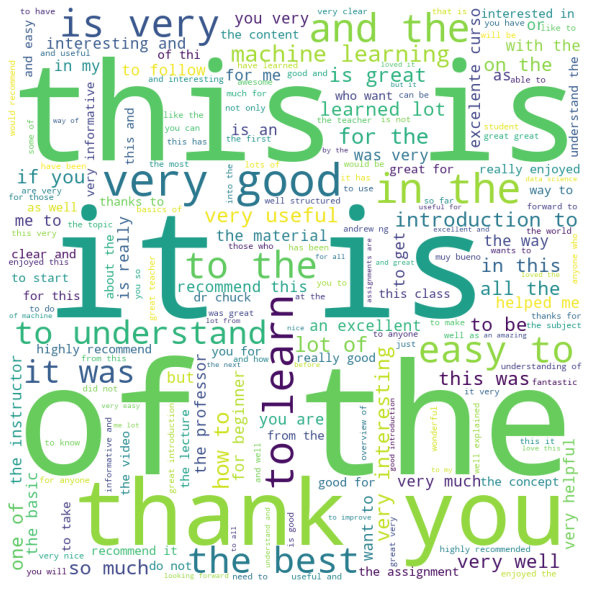

In [15]:
# Wordclouds with Label 5
review_5_corpus = ''
for index,val in data_5.iterrows():
    review_5_corpus = review_5_corpus + " " + val["Review_processed_4"]
review_5_corpus = review_5_corpus.strip()

wordcloud = WordCloud(width = 800, 
                      height = 800,
                      background_color ='white',
                      stopwords = ["coursera","course","courses"],
                      min_font_size = 10).generate(review_5_corpus)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

**Classification using LSTM**

In [16]:
# Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(data["Review_processed_3"],
                                                 data["Label"],
                                                 test_size=0.10,
                                                 random_state=42,
                                                 stratify=data["Label"])

In [17]:
# Impoting keras libraries for preprocessing the text
import keras
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [18]:
# Maximum number of words to be used in the corpus
MAX_NB_WORDS = 50000

# Number of words in each of the sentence
MAX_SEQUENCE_LEN = 350

# Embedding Dimension
EMBEDDING_DIM = 100

# Tokenizing the text
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 49277 unique tokens


In [19]:
# Creating vector from the text file
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LEN)
print('Shape of tensor : ',X_train.shape)

Shape of tensor :  (113024, 350)


In [20]:
# Creating the labels from the output
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)

enc = OneHotEncoder(sparse=False)
y_train = y_train.reshape(len(y_train),1)
enc.fit(y_train)
y_train = enc.transform(y_train)

In [26]:
# Importing keras layers for model building
from keras.layers import Embedding
from keras.layers import LSTM 
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras import metrics 

# function to get the F1 score
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# Building the model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM, input_length = X_train.shape[1]))
model.add(LSTM(100, dropout=0.2))
model.add(Dense(50))
model.add(Dense(5,activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[metrics.categorical_accuracy])

In [27]:
# Running the program
epochs = 5
batch_size = 64
history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
1590/1590 [==============================] - 39s 23ms/step - loss: 0.2206 - categorical_accuracy: 0.7765 - val_loss: 0.1995 - val_categorical_accuracy: 0.7895
Epoch 2/5
1590/1590 [==============================] - 37s 23ms/step - loss: 0.1864 - categorical_accuracy: 0.8056 - val_loss: 0.1966 - val_categorical_accuracy: 0.7969
Epoch 3/5
1590/1590 [==============================] - 37s 23ms/step - loss: 0.1711 - categorical_accuracy: 0.8240 - val_loss: 0.2007 - val_categorical_accuracy: 0.7955
Epoch 4/5
1590/1590 [==============================] - 37s 23ms/step - loss: 0.1566 - categorical_accuracy: 0.8424 - val_loss: 0.2050 - val_categorical_accuracy: 0.7916
Epoch 5/5
1590/1590 [==============================] - 37s 23ms/step - loss: 0.1415 - categorical_accuracy: 0.8613 - val_loss: 0.2240 - val_categorical_accuracy: 0.7891
